# Alguns conceitos de estatística, part II

## 1. Regressão linear simples

 - Suponhe-se que existe uma linearidade na dispersão dos dados
 
 ### Correlação ( R )
   - Mostra a força e direção da relação entre variáveis
   - Pode ser um valor entre -1 e 1
     - Quanto mais proximo de 0, mais fraca a relação.
     - Se > 0, então a relação entre as variáveis tem o mesmo sentido
     - Se < 0, então a relação entre as variáveis tem sentidos opostos
     - Alguns valores:
       - +- 1 -> perfeita
       - +- 0.7 -> forte
       - +- 0.5 -> moderada
       - +- 0.25 -> fraca
       - 0 -> inexistente
   - A correlação de A ~ B é a mesma de B ~ A
   
 ### Coeficiente de determinação ( R² )
   - Mostra o quanto o modelo consegue explicar os dados
   - Quanto maior, mais explicativo
   - Varia entre zero e 1
   - exemplo: R= 0.93 e R²= 0.83, logo, 86% das variaveis dependentes(as respostas) conseguem ser explicadas pelas variáveis explanatórias(os dados) presentes no modelo
 
 - Outliers: são valores que fogem do padrão
 - Interceptação: o valor da variável dependente quando a variável explanatória é igual a zero
 - Inclinação : inclinação da reta linear
 - Variável dependente = interceptação + (inclinação * variável exploratória)

In [4]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot  as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm

In [7]:
base = pandas.read_csv('data/cars.csv')
base = base.drop(['Unnamed: 0'], axis=1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [14]:
x = base.iloc[:,1].values
y = base.iloc[:,0].values

print(x,'\n\n',y)

[  2  10   4  22  16  10  18  26  34  17  28  14  20  24  28  26  34  34
  46  26  36  60  80  20  26  54  32  40  32  40  50  42  56  76  84  36
  46  68  32  48  52  56  64  66  54  70  92  93 120  85] 

 [ 4  4  7  7  8  9 10 10 10 11 11 12 12 12 12 13 13 13 13 14 14 14 14 15
 15 15 16 16 17 17 17 18 18 18 18 19 19 19 20 20 20 20 20 22 23 24 24 24
 24 25]


In [15]:
correlacao = numpy.corrcoef(x,y)
correlacao 

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [16]:
x = x.reshape(-1, 1)
x

array([[  2],
       [ 10],
       [  4],
       [ 22],
       [ 16],
       [ 10],
       [ 18],
       [ 26],
       [ 34],
       [ 17],
       [ 28],
       [ 14],
       [ 20],
       [ 24],
       [ 28],
       [ 26],
       [ 34],
       [ 34],
       [ 46],
       [ 26],
       [ 36],
       [ 60],
       [ 80],
       [ 20],
       [ 26],
       [ 54],
       [ 32],
       [ 40],
       [ 32],
       [ 40],
       [ 50],
       [ 42],
       [ 56],
       [ 76],
       [ 84],
       [ 36],
       [ 46],
       [ 68],
       [ 32],
       [ 48],
       [ 52],
       [ 56],
       [ 64],
       [ 66],
       [ 54],
       [ 70],
       [ 92],
       [ 93],
       [120],
       [ 85]])

In [17]:
modelo_linear_simples = LinearRegression()
modelo_linear_simples.fit(x,y)

#interceptação
inter = modelo_linear_simples.intercept_
# inclinação
incl = modelo_linear_simples.coef_

print(inter,incl)

8.283905641787172 [0.16556757]


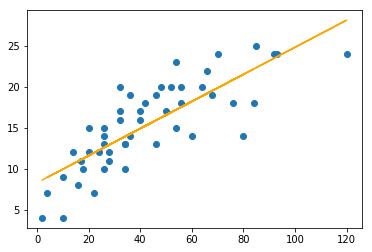

In [18]:
plt.scatter(x, y)
plt.plot(x,modelo_linear_simples.predict(x), color="orange")

In [19]:
modelo_linear_simples.predict([[22]])

array([11.92639228])

In [21]:
#residuos
modelo_linear_simples._residues

478.02124836119646

 ## 2. Regressão linear multipla: 
 
   - Podemos ter mais de uma variável explanatória tentando prever uma variável dependente
   - Analisar cada variável independente com a variável dependente, individualmente
   - Gerar gráfios de dispersão individuas
   - O coeficiente de determinação tende a aumentar com um maior uso de varíáveis explanatórias mesmo que não aumente a precisão do modelo
   - Coeficiente de determinação ajustado: ajusta a variação do modelo de acordo com o número de variáveis independentes que é incluída no modelo
   - Coeficiente de determinação ajustado < coeficiente de determinação
   - Colinearidade: duas variáveis explanatórias que são correlacionadas
   - Usar variáveis idenpendentes colineares pode prejudicar o modelo
   - Parcimônia: usar variáveis independentes que não melhorem em nada o modelo

In [22]:
base1 = pandas.read_csv('data/mt_cars.csv')
base1 = base1.drop(['Unnamed: 0'], axis=1)
base1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [23]:
consumo = base1.iloc[:, 0].values
cilindradas = base1.iloc[:, 2].values
print(consumo)
print(cilindradas)

[21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
 10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
 15.8 19.7 15.  21.4]
[160.  160.  108.  258.  360.  225.  360.  146.7 140.8 167.6 167.6 275.8
 275.8 275.8 472.  460.  440.   78.7  75.7  71.1 120.1 318.  304.  350.
 400.   79.  120.3  95.1 351.  145.  301.  121. ]


In [24]:
correlacao1 = numpy.corrcoef(cilindradas, consumo)
correlacao1

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [25]:
cilindradas = cilindradas.reshape(-1, 1)
cilindradas

array([[160. ],
       [160. ],
       [108. ],
       [258. ],
       [360. ],
       [225. ],
       [360. ],
       [146.7],
       [140.8],
       [167.6],
       [167.6],
       [275.8],
       [275.8],
       [275.8],
       [472. ],
       [460. ],
       [440. ],
       [ 78.7],
       [ 75.7],
       [ 71.1],
       [120.1],
       [318. ],
       [304. ],
       [350. ],
       [400. ],
       [ 79. ],
       [120.3],
       [ 95.1],
       [351. ],
       [145. ],
       [301. ],
       [121. ]])

In [27]:
modelo = LinearRegression()
modelo.fit(cilindradas, consumo)
# Coeficiente de determinação
modelo.score(cilindradas, consumo)

0.7183433404897299

In [29]:
previsoes = modelo.predict(cilindradas)
print(previsoes)

[23.00543556 23.00543556 25.1486218  18.96635381 14.76241157 20.32645276
 14.76241157 23.55359666 23.79676587 22.69220065 22.69220065 18.23272467
 18.23272467 18.23272467 10.14631813 10.64089957 11.46520197 26.35622482
 26.47987017 26.66945973 24.64991885 16.49344661 17.07045829 15.17456277
 13.11380677 26.34386028 24.64167582 25.68029685 15.13334765 23.62366236
 17.19410365 24.61282524]


In [31]:
                                # relação, variavel dependente ~ independente
modelo_ajustado = sm.ols(formula='mpg ~ disp', data=base1)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           9.38e-10
Time:                        12:59:08   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

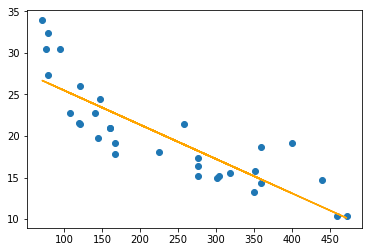

In [32]:
plt.scatter(cilindradas, consumo)
plt.plot(cilindradas, previsoes, color='orange')

In [39]:
variaveis_independentes = base1.iloc[:, 1:4].values
variaveis_independentes

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [41]:
modelo2 = LinearRegression()
modelo2.fit(variaveis_independentes, consumo)
modelo2.score(variaveis_independentes, consumo)

0.7678877440928638

In [43]:
modelo_ajustado2 = sm.ols(formula='mpg ~ disp + cyl + hp', data=base1)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           5.05e-09
Time:                        13:04:50   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
                        # cyl, disp, hp
nova_previsao = numpy.array([4, 200, 100])
nova_previsao = nova_previsao.reshape(1, -1)
nova_previsao

array([[  4, 200, 100]])

In [45]:
modelo2.predict(nova_previsao)

array([24.03968887])